<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/m08-communities/link_communities_assignment.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/yy/netsci-course/blob/master/m08-communities/link_communities_assignment.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
</table>

# Link communities
For this assignment we will take a look at link communities and how they differ from node communities. In order to do this we will use the algorithm discussed in the reading ("Link communities reveal multiscale complexity in networks") and link community video from canvas.

A small python module has been prepared that will allow you to use the link community algorithm with Anaconda and Python 3.5. To install the module you want to open a terminal or shell and use:

```
pip install git+https://github.com/Nathaniel-Rodriguez/linkcom.git
```

This will install the package locally in your Anaconda site-packages directory (the same place where the `conda` command would install new packages). Make sure you have [git](https://git-scm.com/) installed first. If you are using Windows you will need to use the Anaconda command prompt when using pip, so that it adds the package to Anaconda. If you have trouble installing the package you can just unpack the zip file from the [github repository](https://github.com/Nathaniel-Rodriguez/linkcom/tree/master/linkcom) and put the linkcom folder in your working directory.

To use the package you can do:

In [4]:
import linkcom

The code has been adapted so that it will work with networkx graphs. The link communities algorithm requires simple undirected graphs to use. This means there can't be any self-loops or parallel edges. However, you can use weighted graphs.

In [5]:
# First lets import networkx
import networkx as nx

# And generate a new graph
my_graph = nx.erdos_renyi_graph(100, 0.1)

# We need to make sure this is a graph of type Graph
print(type(my_graph).__name__)

Graph


If the graph you load in isn't of type Graph (it maybe a Multigraph or DiGraph), it is easy to convert it to one:

In [6]:
my_graph = nx.Graph(my_graph)

## Using linkcom
Now lets call the `cluster` method in `linkcom` to cluster the links of the graph. The `cluster` method takes several optional arguments:

```
linkcom.cluster(nx_graph, threshold=None, is_weighted=False, weight_key='weight', dendro_flag=False, to_file=False, basename="clustering", delimiter='\t')
```

`Threshold`: sets the cut-off for the dendrogram.

`is_weighted`: can be `True` or `False` depending upon whether the graph has weights or not. Set this to `True` if the graph is weighted.

`weight_key`: specifies what attribute the edges have that has weight values. In networkx it is convention that this key be set to `weight`. Most functions in networkx will assume this is the key. This is also the default value for the cluster method.

`dendro_flag`: specifies whether to return the dendrogram (only applicable if the graph is unweighted and no threshold is given).

`to_file`: specifies whether to write the outputs to file. Several files will be written and given names based on `basename` with elements separated by `delimiter`. 

These outputs will be written to file:

```
Three text files with extensions .edge2comm.txt, .comm2edges.txt,
and .comm2nodes.txt store the communities.

edge2comm, an edge on each line followed by the community
id (cid) of the edge's link comm:
node_i <delimiter> node_j <delimiter> cid <newline>

comm2edges, a list of edges representing one community per line:
cid <delimiter> ni,nj <delimiter> nx,ny [...] <newline>

comm2nodes, a list of nodes representing one community per line:
cid <delimiter> ni <delimiter> nj [...] <newline>

The output filename contains the threshold at which the dendrogram
was cut, if applicable, or the threshold where the maximum
partition density was found, and the value of the partition 
density.

If no threshold was given to cut the dendrogram, a file ending with
'_thr_D.txt' is generated, containing the partition density as a
function of clustering threshold.

If the dendrogram option was given, two files are generated. One with
'.cid2edge.txt' records the id of each edge and the other one with
'.linkage.txt' stores the linkage structure of the hierarchical 
clustering. In the linkage file, the edge in the first column is 
merged with the one in the second at the similarity value in the 
third column.
```

The cluster method will return a tuple with different elements:

    If no threshold is given, then a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, (float) best similarity, (float) best partition density, (list) partition density list.

    If dendro_flag is given (only applicable if no threshold), then a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, (float) best similarity, (float) best partition density, (list) partition density list, (dict) keys=edges and values=community membership for original, (list) dendrogram.

    If threshold is given a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, partition density at threshold.

You will mostly just be interested in using the dictionary which contains the community assignment data, which is always the first element of the tuple. Lets do a short example:

In [7]:
e2c, S, D, Dlist = linkcom.cluster(my_graph)

clustering...
computing similarities...
# D_max = 0.079821
# S_max = 0.190476


In [8]:
Dlist

[(1.0, 0.0),
 (0.4545454545454546, 0.0),
 (0.368421052631579, 0.0),
 (0.35, 0.0),
 (0.3125, 0.002795248078266946),
 (0.3076923076923077, 0.002795248078266946),
 (0.2941176470588236, 0.002795248078266946),
 (0.29166666666666674, 0.002795248078266946),
 (0.2857142857142857, 0.002795248078266946),
 (0.2727272727272727, 0.009084556254367576),
 (0.2666666666666666, 0.009084556254367576),
 (0.26315789473684204, 0.01607267645003494),
 (0.25, 0.015024458420684837),
 (0.23809523809523814, 0.04122990915443746),
 (0.23529411764705888, 0.04122990915443746),
 (0.23076923076923084, 0.048427672955974846),
 (0.2272727272727273, 0.048427672955974846),
 (0.2222222222222222, 0.0589098532494759),
 (0.21739130434782605, 0.06135569531795949),
 (0.2142857142857143, 0.06543875411799942),
 (0.21052631578947367, 0.06623739642607568),
 (0.20833333333333337, 0.06919736448038337),
 (0.19999999999999996, 0.06312363387835086),
 (0.1923076923076923, 0.07854024413305523),
 (0.19047619047619047, 0.07982139950226091),
 

If we print `e2c` we will see that each edge has a community membership:

In [9]:
print(e2c)

{(47, 53): 0, (36, 71): 299, (47, 71): 299, (29, 32): 323, (70, 82): 32, (8, 9): 433, (9, 63): 6, (17, 76): 299, (0, 14): 8, (5, 92): 9, (40, 59): 10, (48, 72): 205, (50, 91): 278, (2, 41): 461, (44, 56): 14, (20, 95): 361, (88, 95): 16, (55, 70): 461, (57, 98): 433, (47, 84): 64, (9, 67): 433, (48, 58): 21, (21, 41): 461, (21, 50): 23, (61, 95): 24, (8, 98): 433, (30, 98): 433, (33, 42): 27, (81, 91): 28, (2, 36): 299, (39, 94): 53, (12, 77): 136, (43, 55): 32, (51, 77): 136, (43, 73): 165, (51, 86): 136, (66, 84): 24, (13, 78): 37, (1, 85): 288, (47, 52): 39, (36, 61): 299, (36, 70): 299, (5, 73): 42, (28, 75): 153, (21, 36): 299, (6, 47): 299, (29, 49): 323, (69, 85): 288, (27, 79): 48, (80, 94): 433, (42, 95): 50, (11, 89): 299, (73, 82): 165, (39, 89): 53, (12, 72): 136, (43, 50): 55, (51, 72): 136, (35, 55): 57, (14, 32): 58, (32, 68): 256, (35, 64): 60, (13, 73): 61, (36, 47): 299, (28, 43): 63, (47, 65): 64, (30, 88): 182, (25, 28): 66, (23, 58): 67, (35, 41): 60, (72, 99): 299

Since this is a random graph, we expect there not to be any meaningful communities, and indeed they are all labelled `56` (the community ID), so there doesn't appear to be any link communities in the graph.

We can now readily take our results and put them back into our graph so that it can be saved and viewed in Gephi. We can do this using the [`set_edge_attributes`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html?highlight=set_edge_attributes#networkx.classes.function.set_edge_attributes) function in networkx. It works just like the `set_node_attributes` function from previuos assignments, but with edges instead:

In [10]:
# Put the link communities into the graph
# Note this function's syntax depends on the networkx version.
# If you use networkx 1.9 and below this line should be
# nx.set_edge_attributes(my_graph, "linkcom", e2c)
nx.set_edge_attributes(my_graph, e2c, "linkcom")

# Save the graph to file
nx.write_gexf(my_graph, "my_graph.gexf")

Now if we were to open the graph in Gephi we should be able to use the link communities to color the graph edges. In Gephi you may need to click the little attribute type button so that edge attributes are set to [ranked rather than numeric](https://gephi.org/tutorials/gephi-tutorial-quick_start.pdf). This is because we want to color the edges according to their membership and not with a gradient. Additionally, in order to keep the edge colors when saving the graph you will need to make sure the edge color in the Preview tab is set to `original`. Lastly, since you will be looking at link communities (which determine the node membership in link clustering) it will be helpful to increase the size of the edges in Gephi so the colors are more visible and so you can detect nodes that belong to multiple communities.

## The task
You can choose one from these two datasets:

One is the NetSci collaboration graph. The nodes of the graph are people and links are formed between people who co-author a scientific paper together in network science. You can download it from [here](http://vlado.fmf.uni-lj.si/pub/networks/data/collab/netscience.htm). Hint: load with `read_pajek`.

The graph has ~1500 nodes and is partly disconnected. If you have difficulty working with the full graph or trouble loading it into Gephi, you can use the largest connected component (which only has about 350 nodes). The largest connected component of a graph can be returned from networkx using:

```
largest_component = my_graph.subgraph(sorted(nx.connected_components(my_graph), key=len, reverse=True)[0])
```

Most of the interesting stuff is happening around this component anyway. So you don't lose much except for the scientists and groups that decided to work alone.

Another option is the word association graph. Download: [here](https://www.dropbox.com/s/oky3cwwtwy1dfs0/word.edgelist?dl=0)

Follow these steps for the assignment:

Gephi users:
1. Load the graph and run the link communities clustering algorithm on it using linkcom module. You can follow the above-mentioned instructions to use the linkcom module.
2. Save the link communities to the graph and save the graph to file.
3. In Gephi choose a good layout for the graph.
4. Run the modularity command to generate communities for the nodes.
5. Color the edges according to the link communities and the nodes according to the communities found by Gephi. Remember to take care in choosing the resolution parameter.
6. How well does link clustering do at detecting community structure? How well does Gephi's node modularity do at detecting community structure? What do you think the communities represent?
7. What are the similarities and differences between the communities detected by either algorithm?
8. Which authors have a prominent position in multiple communities? What do you think these author's roles are?
9. What other features do you notice about the graph that are captured with overlaping communities?
10. Save your visualization to file.
11. Once complete, submit a PDF document to Canvas that contains your responses and your graph visualization (since this is a larger graph feel free to crop the figure so that it only includes parts relevant to your responses).

Cytoscape users:
1. Instead of the code above, you may want to write the edges and their attributes into a `.csv` (comma seperated values) file. In Cytoscape, use "File" -> "Import" -> "Table from file".
2. Follow the instructions above. You can use some community detection plugins of your choice. It is ok if some details are different.

In [11]:
#NetScience.net graph
netsci_graph = nx.read_pajek("netsience.net")

In [17]:
largest_component = netsci_graph.subgraph(sorted(nx.connected_components(netsci_graph), key=len, reverse=True)[0])
print(largest_component)

MultiGraph with 379 nodes and 914 edges


In [18]:
print(largest_component.nodes())

['Catanzaro, M', 'Petermannn, T', 'Kertesz, J', 'Freund, H', 'Szathmary, E', 'Mason, S', 'Hengartner, N', 'Johnson, G', 'Frasca, M', 'Maghoul, F', 'Camacho, J', 'Stroud, D', 'Spata, A', 'Barabasi, A', 'Smith, E', 'Guichard, E', 'Caruso, F', 'Moreira, A', 'Dickman, R', 'Weigt, M', 'Holter, N', 'Rosenblum, M', 'Diambra, L', 'Zhou, C', 'Liu, Z', 'Giles, C', 'Nishikawa, T', 'Castri, M', 'Dezso, Z', 'Larosa, M', 'Schwartz, N', 'Neda, Z', 'Sole, R', 'Park, H', 'Gregoire, G', 'Rinaldo, A', 'Provero, P', 'Tadic, B', 'Gomezgardenes, J', 'Jung, S', 'Maza, D', 'Krapivsky, P', 'Gondran, B', 'Latora, V', 'Dobrin, R', 'Segev, R', 'Hopcroft, J', 'Colaiori, F', 'Gross, J', 'Oltvai, Z', 'Havlin, S', 'Balthrop, J', 'Song, C', 'Czirok, A', 'Buhl, J', 'Pacheco, A', 'Moreno, Y', 'Chung, J', 'Lopezruiz, R', 'Sabel, C', 'Albert, R', 'Albert, I', 'Park, E', 'Trusina, A', 'Flammini, A', 'Frauenfelder, H', 'Pennock, D', 'Coccetti, F', 'Toroczkai, Z', 'Thurner, S', 'Echenique, P', 'Radicchi, F', 'Porter, M', 'Ne

In [19]:
# Converting to graph

lc_graph = nx.Graph(largest_component)
print(type(lc_graph).__name__)

Graph


In [20]:
#Link communities

e2c, S1, D1, DList1 = linkcom.cluster(lc_graph)
print(e2c)

clustering...
computing similarities...
# D_max = 0.463159
# S_max = 0.416667
{('Hoppensteadt, F', 'Motter, A'): 0, ('Erez, K', 'Havlin, S'): 779, ('Beg, Q', 'Oltvai, Z'): 380, ('Caldarelli, G', 'Colaiori, F'): 421, ('Latora, V', 'Porta, S'): 4, ('Barthelemy, M', 'Gondran, B'): 5, ('Ravasz, E', 'Somera, A'): 713, ('Munoz, M', 'Torres, J'): 849, ('Berlow, E', 'Martinez, N'): 397, ('Leyvraz, F', 'Redner, S'): 772, ('Kalapala, V', 'Sanwalani, V'): 641, ('Arenas, A', 'Vegaredondo, F'): 571, ('Kulkarni, R', 'Stroud, D'): 12, ('Neda, Z', 'Vicsek, T'): 713, ('Bernardes, A', 'Kertesz, J'): 14, ('Rosenblum, M', 'Weule, M'): 425, ('Kovacs, B', 'Oltvai, Z'): 132, ('Broder, A', 'Wiener, J'): 805, ('Vazquez, A', 'Zecchina, R'): 316, ('Caldarelli, G', 'Capocci, A'): 421, ('Kaski, K', 'Kertesz, J'): 822, ('Diazguilera, A', 'Rubi, M'): 21, ('Adler, J', 'Aharony, A'): 94, ('Kujala, J', 'Salmelin, R'): 835, ('Dunne, J', 'Martinez, N'): 397, ('Newman, M', 'Watts, D'): 645, ('Dafontouracosta, L', 'Stauffe

In [21]:
#Saving graph
nx.set_edge_attributes(lc_graph, e2c, "linkcom")

In [22]:
nx.write_gexf(lc_graph, "netsci_graph.gexf")

### 3. In Gephi choose a good layout for the graph.

##### Layout
* OpenOrd
* Default Settings

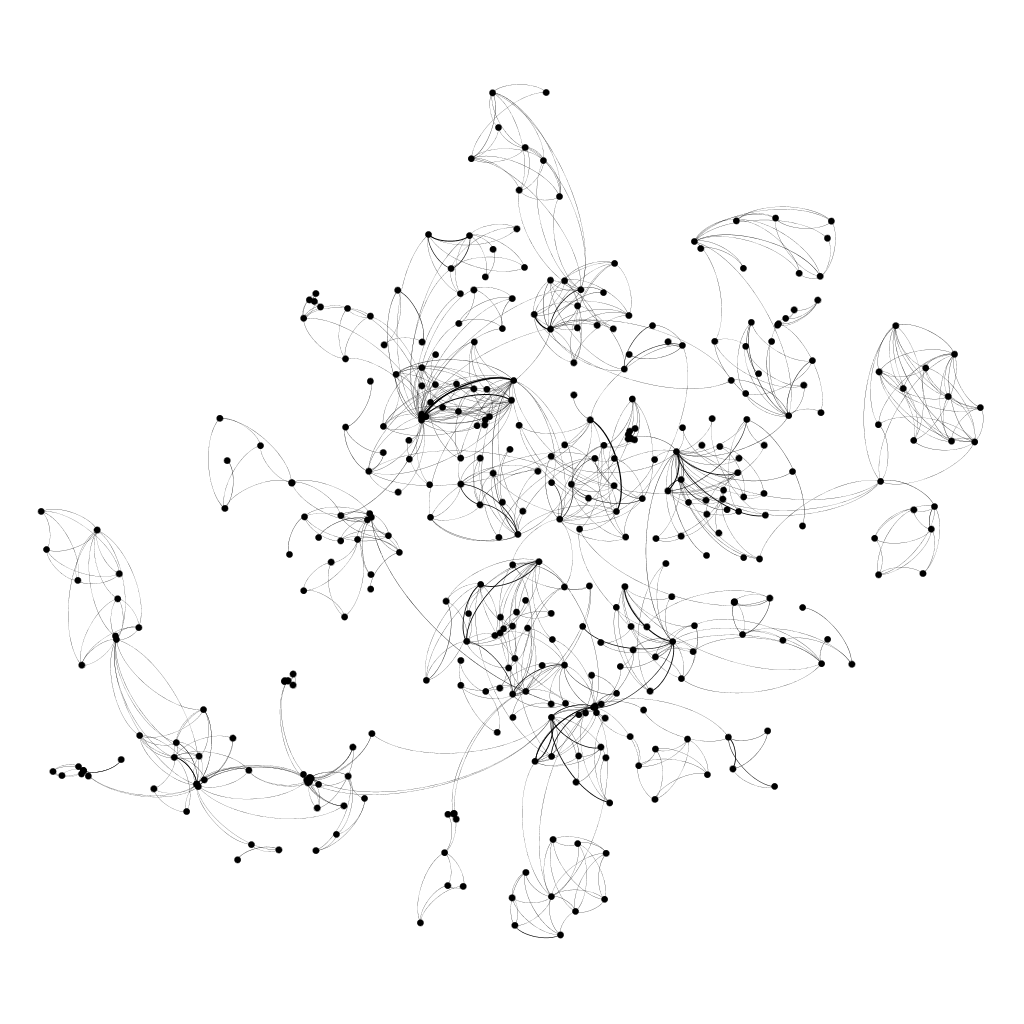

In [23]:
from IPython.display import Image
Image(filename="netsci.png")

### 4. Run the modularity command to generate communities for the nodes.

<HTML> <BODY> <h1>Modularity Report </h1> <hr><h2> Parameters: </h2>Randomize:  On<br>Use edge weights:  On<br>Resolution:  1.0<br><br> <h2> Results: </h2>Modularity: 0.849<br>Modularity with resolution: 0.849<br>Number of Communities: 18<br /><br />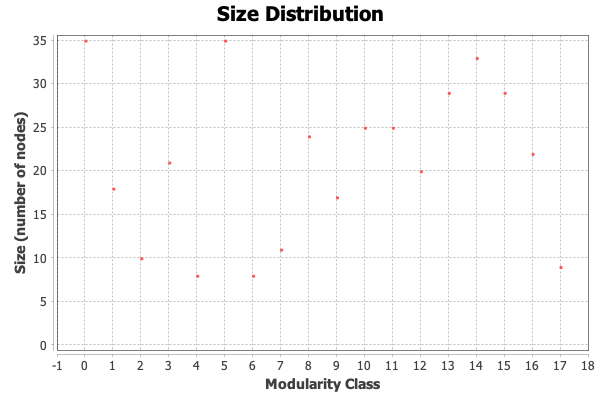</IMG><br /><br /><h2> Algorithm: </h2>Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre, <i>Fast unfolding of communities in large networks</i>, in Journal of Statistical Mechanics: Theory and Experiment 2008 (10), P1000<br /><br /><br /><h2> Resolution: </h2>R. Lambiotte, J.-C. Delvenne, M. Barahona <i>Laplacian Dynamics and Multiscale Modular Structure in Networks 2009<br /></BODY> </HTML>

### 5. Color the edges according to the link communities and the nodes according to the communities found by Gephi. Remember to take care in choosing the resolution parameter.

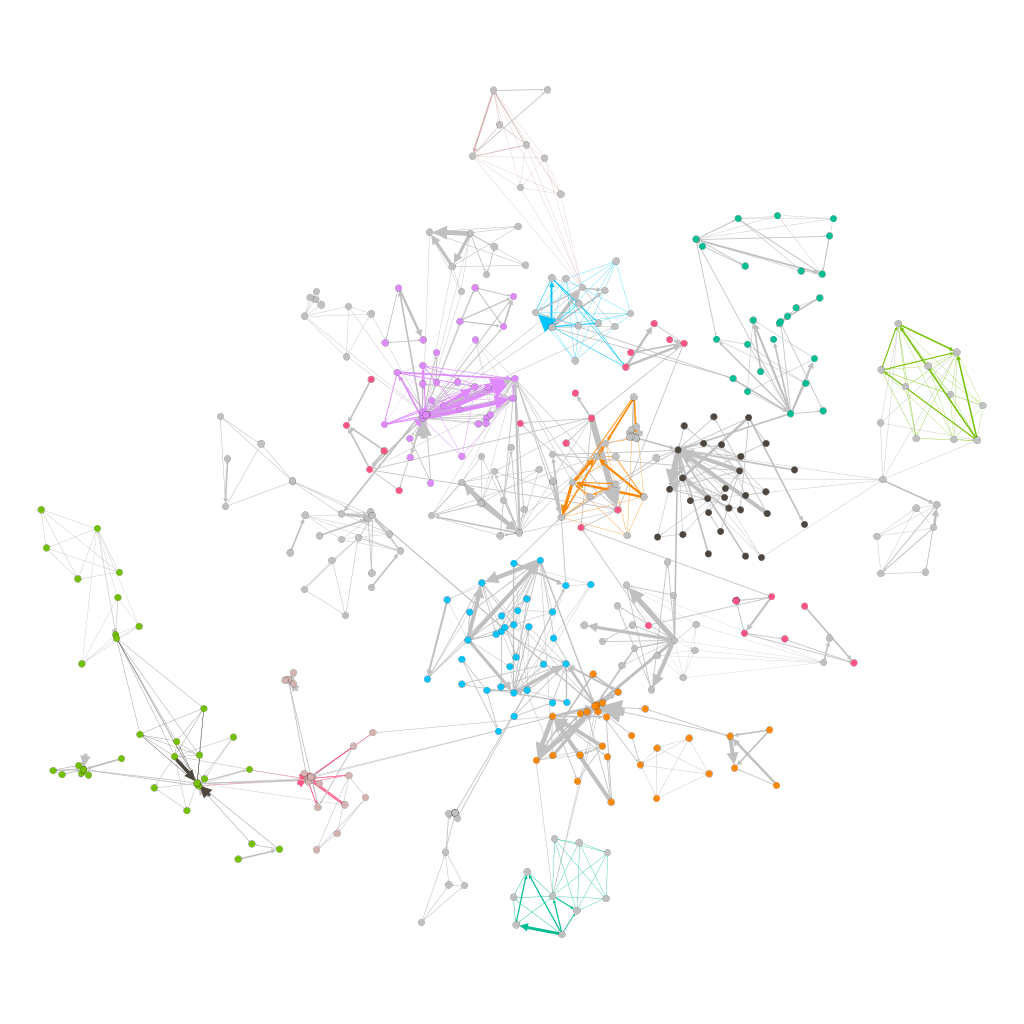

In [27]:
Image(filename="netsci_color.png")

### 6. How well does link clustering do at detecting community structure? How well does Gephi's node modularity do at detecting community structure? What do you think the communities represent?
Link clustering does equally well as Gephi's node modularity at detecting community structure. Link clustering however as we see from the colored network above detects some of the other smaller communities which Gephi does not. The communities I think represent collaborators, teams, competitors as well as research and works in the same or closely related areas.

### 7. What are the similarities and differences between the communities detected by either algorithm?
Link Clustering is able to find smaller communities which Gephi could not do. Gephi can possibly achieve the detection of smaller communities by reducing the resolution to very very low but then the community size may not be representative or useful. In terms of similarity - we can seem from the networks above that both algorithms are able to find some of the same communities.


### 8. Which authors have a prominent position in multiple communities? What do you think these author's roles are?
The network above does not show any authors in multiple communities which is not common.

Observing the blue and orange communities (the bottom) we find Perez, C (blue) and Flammini, A (orange). Each have a strong connection with others in their community - judging by the number of links, and they have a relationship with each other which could provide them a dual community membership from one viewpoint.

### 9. What other features do you notice about the graph that are captured with overlaping communities?
I could not find any overlaping communities.

### 10. Save your visualization to file.
Saved

### 11. Once complete, submit a PDF document to Canvas that contains your responses and your graph visualization (since this is a larger graph feel free to crop the figure so that it only includes parts relevant to your responses).